# Analysis of the GridSearchCV results for the initial DCCA Attempt:

## Importing stuff

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pprint
import pickle
from statistics import mean
from operator import itemgetter

## Reading the previously saved results:

In [3]:
with open("InitialGridSearch_Results.pkl", "rb") as fp:   # Unpickling
    results = pickle.load(fp)

print("The nunmber of different results are: ", len(results))
print()
# each result is in the format ([training_losses], [validation_losses], test_loss, parameters):

best_test_loss = min(results, key=itemgetter(2))
print("The best test loss that was managed is: ", best_test_loss[2])
print("The test loss was managed with the following parameters:")
pprint.pprint(best_test_loss[3])
print()

The nunmber of different results are:  288

The best test loss that was managed is:  -128.82043919333248
The test loss was managed with the following parameters:
{'batch_sz': 1000,
 'hidden_layer_size1': [1024, 1024, 1024, 1024],
 'hidden_layer_size2': [1024, 1024, 1024, 1024],
 'learning_rate': 0.001,
 'outdim': 150,
 'reg_par': 0.0001}



## Analysis:

### Analyzing based on Output Layer Dimension Size:

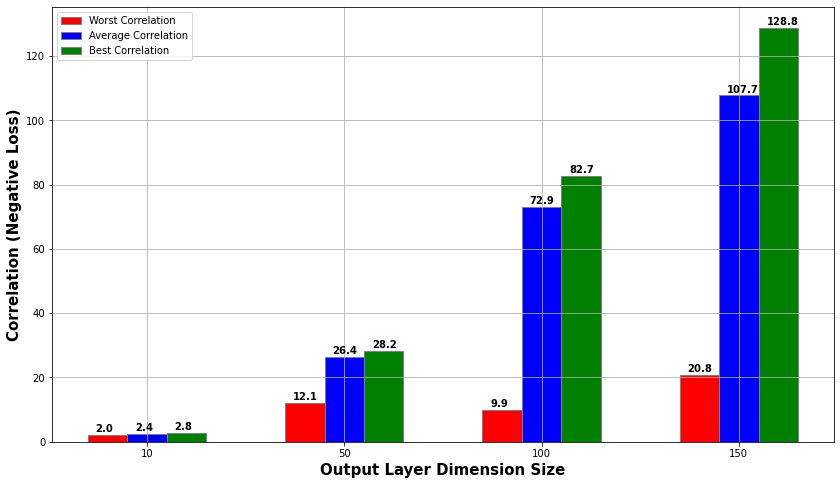

In [4]:
# Discard any unneeded information for easier processing:
outdim_results = []
for r in results:
    outdim_results.append((r[2], r[3]['outdim']))

# Find out the range of values of the results:
outdim_keys = [x[1] for x in outdim_results]
outdim_keys = sorted(list(set(outdim_keys)))


# Find min, max, avg for each outdim_key:
minimums = []
maximums = []
averages = []
for key in outdim_keys:
    key_values = [x[0] for x in outdim_results if x[1]==key]
    minimums.append(min(key_values))
    maximums.append(max(key_values))
    averages.append(mean(key_values))

# Plot the values:
barWidth = 0.2
fig = plt.subplots(figsize =(14, 8))
br1 = np.arange(len(outdim_keys))
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 

b1 = plt.bar(br1, [i * -1 for i in maximums], color ='r', width = barWidth, edgecolor ='grey', label ='Worst Correlation')
b2 = plt.bar(br2, [i * -1 for i in averages], color ='b', width = barWidth, edgecolor ='grey', label ='Average Correlation')
b3 = plt.bar(br3, [i * -1 for i in minimums], color ='g', width = barWidth, edgecolor ='grey', label ='Best Correlation')

plt.xlabel('Output Layer Dimension Size', fontweight ='bold', fontsize = 15)
plt.ylabel('Correlation (Negative Loss)', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(outdim_keys))],outdim_keys)
plt.grid()
plt.legend()
for bars in [b1,b2,b3]:
    for bar in bars:
        yval = bar.get_height()
        yval = round(yval,1)
        plt.text(bar.get_x() + barWidth/5, yval + 1, yval, fontweight = 'bold')
plt.show()

### Analyzing based on Hidden Layer Size:

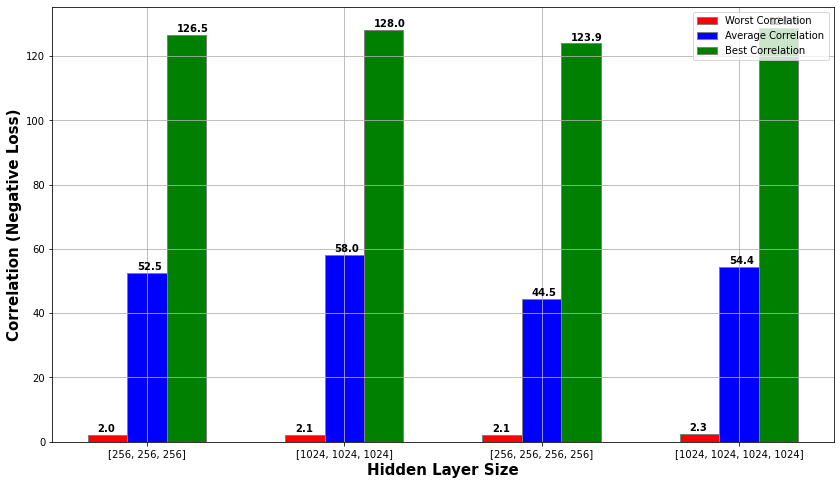

In [5]:
# Discard any unneeded information for easier processing:
hidden_layer_results = []
for r in results:
    hidden_layer_results.append((r[2], r[3]['hidden_layer_size1']))

# Find out the range of values of the results:
hidden_layer_keys = [x[1] for x in hidden_layer_results]
h = []
for x in hidden_layer_keys:
    if x in h:
        continue
    else:
        h.append(x)
hidden_layer_keys = h

# Find min, max, avg for each hidden_layer_key:
minimums = []
maximums = []
averages = []
for key in hidden_layer_keys:
    key_values = [x[0] for x in hidden_layer_results if x[1]==key]
    minimums.append(min(key_values))
    maximums.append(max(key_values))
    averages.append(mean(key_values))

# Plot the values:
barWidth = 0.2
fig = plt.subplots(figsize =(14, 8))
br1 = np.arange(len(hidden_layer_keys))
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 

b1 = plt.bar(br1, [i * -1 for i in maximums], color ='r', width = barWidth, edgecolor ='grey', label ='Worst Correlation')
b2 = plt.bar(br2, [i * -1 for i in averages], color ='b', width = barWidth, edgecolor ='grey', label ='Average Correlation')
b3 = plt.bar(br3, [i * -1 for i in minimums], color ='g', width = barWidth, edgecolor ='grey', label ='Best Correlation')

plt.xlabel('Hidden Layer Size', fontweight ='bold', fontsize = 15)
plt.ylabel('Correlation (Negative Loss)', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(hidden_layer_keys))],hidden_layer_keys)
plt.grid()
plt.legend()
for bars in [b1,b2,b3]:
    for bar in bars:
        yval = bar.get_height()
        yval = round(yval,1)
        plt.text(bar.get_x() + barWidth/4, yval + 1, yval, fontweight = 'bold')
plt.show()

### Analyzing based on Batch Size:

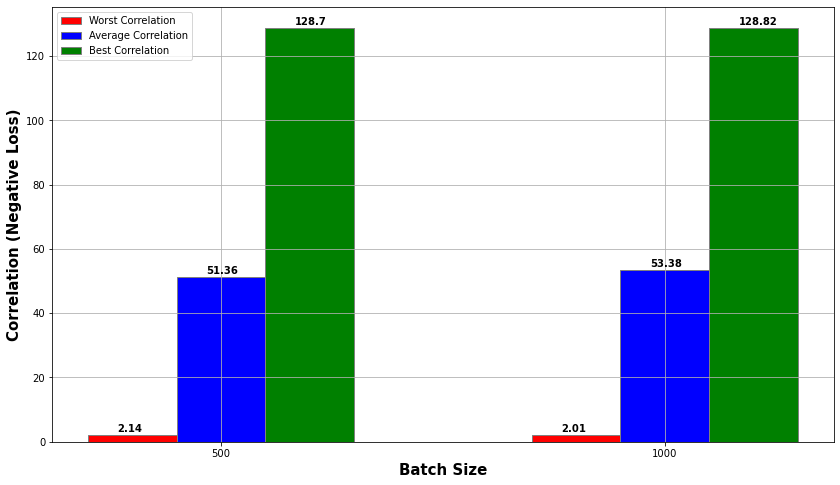

In [9]:
# Discard any unneeded information for easier processing:
batch_sz_results = []
for r in results:
    batch_sz_results.append((r[2], r[3]['batch_sz']))

# Find out the range of values of the results:
batch_sz_keys = [x[1] for x in batch_sz_results]
batch_sz_keys = sorted(list(set(batch_sz_keys)))


# Find min, max, avg for each batch_sz_key:
minimums = []
maximums = []
averages = []
for key in batch_sz_keys:
    key_values = [x[0] for x in batch_sz_results if x[1]==key]
    minimums.append(min(key_values))
    maximums.append(max(key_values))
    averages.append(mean(key_values))

# Plot the values:
barWidth = 0.2
fig = plt.subplots(figsize =(14, 8))
br1 = np.arange(len(batch_sz_keys))
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 

b1 = plt.bar(br1, [i * -1 for i in maximums], color ='r', width = barWidth, edgecolor ='grey', label ='Worst Correlation')
b2 = plt.bar(br2, [i * -1 for i in averages], color ='b', width = barWidth, edgecolor ='grey', label ='Average Correlation')
b3 = plt.bar(br3, [i * -1 for i in minimums], color ='g', width = barWidth, edgecolor ='grey', label ='Best Correlation')

plt.xlabel('Batch Size', fontweight ='bold', fontsize = 15)
plt.ylabel('Correlation (Negative Loss)', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(batch_sz_keys))],batch_sz_keys)
plt.grid()
plt.legend()
for bars in [b1,b2,b3]:
    for bar in bars:
        yval = bar.get_height()
        yval = round(yval,2)
        plt.text(bar.get_x() + barWidth/3, yval + 1, yval, fontweight = 'bold')
plt.show()

### Analyzing based on Learning Rate

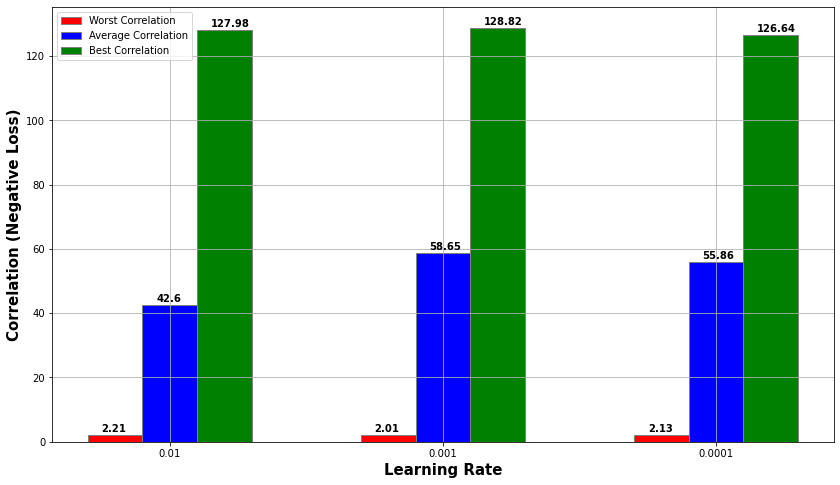

In [7]:
# Discard any unneeded information for easier processing:
learning_rate_results = []
for r in results:
    learning_rate_results.append((r[2], r[3]['learning_rate']))

# Find out the range of values of the results:
learning_rate_keys = [x[1] for x in learning_rate_results]
learning_rate_keys = sorted(list(set(learning_rate_keys)))
learning_rate_keys.reverse()

# Find min, max, avg for each learning_rate_key:
minimums = []
maximums = []
averages = []
for key in learning_rate_keys:
    key_values = [x[0] for x in learning_rate_results if x[1]==key]
    minimums.append(min(key_values))
    maximums.append(max(key_values))
    averages.append(mean(key_values))

# Plot the values:
barWidth = 0.2
fig = plt.subplots(figsize =(14, 8))
br1 = np.arange(len(learning_rate_keys))
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 

b1 = plt.bar(br1, [i * -1 for i in maximums], color ='r', width = barWidth, edgecolor ='grey', label ='Worst Correlation')
b2 = plt.bar(br2, [i * -1 for i in averages], color ='b', width = barWidth, edgecolor ='grey', label ='Average Correlation')
b3 = plt.bar(br3, [i * -1 for i in minimums], color ='g', width = barWidth, edgecolor ='grey', label ='Best Correlation')

plt.xlabel('Learning Rate', fontweight ='bold', fontsize = 15)
plt.ylabel('Correlation (Negative Loss)', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(learning_rate_keys))],learning_rate_keys)
plt.grid()
plt.legend()
for bars in [b1,b2,b3]:
    for bar in bars:
        yval = bar.get_height()
        yval = round(yval,2)
        plt.text(bar.get_x() + barWidth/4, yval + 1, yval, fontweight = 'bold')
plt.show()

### Analyzing based on Regularization Parameter:

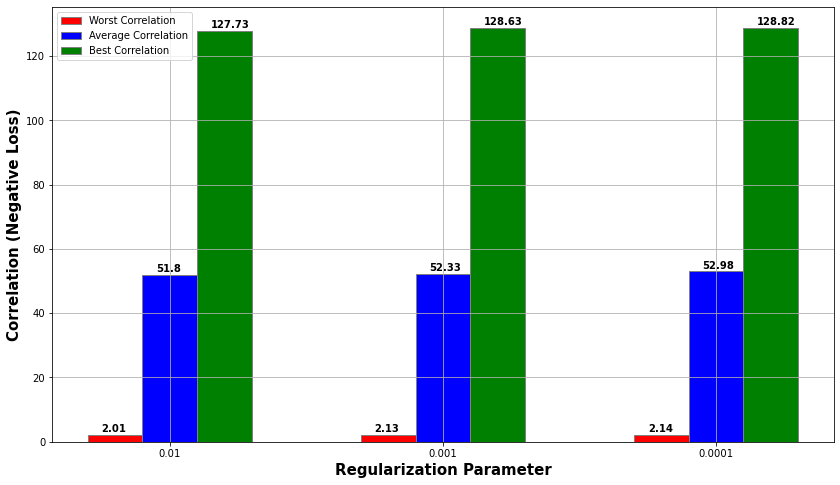

In [10]:
# Discard any unneeded information for easier processing:
reg_par_results =[]
for r in results:
    reg_par_results.append((r[2], r[3]['reg_par']))

# Find out the range of values of the results:
reg_par_keys = [x[1] for x in reg_par_results]
reg_par_keys = sorted(list(set(reg_par_keys)))
reg_par_keys.reverse()

# Find min, max, avg for each reg_par_key:
minimums = []
maximums = []
averages = []
for key in reg_par_keys:
    key_values = [x[0] for x in reg_par_results if x[1]==key]
    minimums.append(min(key_values))
    maximums.append(max(key_values))
    averages.append(mean(key_values))

# Plot the values:
barWidth = 0.2
fig = plt.subplots(figsize =(14, 8))
br1 = np.arange(len(reg_par_keys))
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 

b1 = plt.bar(br1, [i * -1 for i in maximums], color ='r', width = barWidth, edgecolor ='grey', label ='Worst Correlation')
b2 = plt.bar(br2, [i * -1 for i in averages], color ='b', width = barWidth, edgecolor ='grey', label ='Average Correlation')
b3 = plt.bar(br3, [i * -1 for i in minimums], color ='g', width = barWidth, edgecolor ='grey', label ='Best Correlation')

plt.xlabel('Regularization Parameter', fontweight ='bold', fontsize = 15)
plt.ylabel('Correlation (Negative Loss)', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(reg_par_keys))],reg_par_keys)
plt.grid()
plt.legend()
for bars in [b1,b2,b3]:
    for bar in bars:
        yval = bar.get_height()
        yval = round(yval,2)
        plt.text(bar.get_x() + barWidth/4, yval + 1, yval, fontweight = 'bold')
plt.show()

## Conclusions

The following can be inferred from the above analysis:

|  **_Parameter Action_**  	|      **_Correlation (Negative Loss)_**      	|
|:------------------------:	|:--------------------------------------------:	|
|  Output Dimension Size ↑ 	|                       ↑                      	|
|    Hidden Layer Size ↑   	|                       ↑                      	|
|      Learning Rate       	|           Medium to low LR is best           	|
|        Batch Size        	|           Stays basically the same           	|
| Regularization Parameter 	|           Stays basically the same           	|